# Gather

In [1]:
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

1. upload 'twitter-archive-enhanced.csv' file to juypter notebook workspace and then read it into a dataframe.

In [2]:
twitter_archived = pd.read_csv('twitter-archive-enhanced.csv')

2. use requests to fetch the "image_predictions.tsv" from the given url, and then import it into a datafram.

In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open("image_predictions.tsv",'wb') as file:
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image_predictions.tsv',sep ="\t" )

3. query Twitter API for the tweets info using tweepy api and save data to a text file in json format. Then, extract the data from the text file line by line and convert to json object and extract neccessary info.

In [5]:
'''
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

tweet_ids = twitter_archived.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

'''

'\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)\n\ntweet_ids = twitter_archived.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(twee

In [6]:
df_list = []
with open("tweet-json.txt") as file:
    for line in file:
        jason_data = json.loads(line)
        tweet_id = jason_data['id']
        retweet_count = jason_data['retweet_count']
        favorite_count = jason_data['favorite_count']
        source = jason_data['source']
        language = jason_data['lang']
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count,
                        'language': language})
tweet_api = pd.DataFrame(df_list)


# Assess

## 1. twitter_archived

In [7]:
twitter_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
twitter_archived.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
1942,673711475735838725,NaN,NaN,2015-12-07 03:51:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673711475...,10,10,None,None,None,None,None
2111,670442337873600512,NaN,NaN,2015-11-28 03:21:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Koda. He's large. Looks very soft. Great ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670442337...,11,10,Koda,None,None,None,None
1332,705475953783398401,NaN,NaN,2016-03-03 19:32:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Zara. She found a sandal and coul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705475953...,12,10,Zara,None,None,None,None
1970,673295268553605120,NaN,NaN,2015-12-06 00:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Eve. She's a raging alcoholic 8/10 (would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
1408,699072405256409088,NaN,NaN,2016-02-15 03:27:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ERMAHGERD 12/10 please enjoy https://t.co/7WrA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699072405...,12,10,None,None,None,None,None
753,778774459159379968,NaN,NaN,2016-09-22 01:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: In case you haven't seen the mo...,7.580996e+17,4.196984e+09,2016-07-27 00:40:12 +0000,"https://vine.co/v/hQJbaj1VpIz,https://vine.co/...",13,10,None,None,None,None,None
1001,747933425676525569,NaN,NaN,2016-06-28 23:23:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pls don't send more sherks. I don't care how s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747933425...,11,10,None,None,None,None,None
2163,669375718304980992,NaN,NaN,2015-11-25 04:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billl. He's trying to be a ghost but h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669375718...,6,10,Billl,None,None,None,None
521,809920764300447744,NaN,NaN,2016-12-17 00:38:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Please only send in dogs. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/809920764...,10,10,None,None,None,None,None


In [9]:
twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archived[~twitter_archived.retweeted_status_timestamp.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [12]:
mean_rating = twitter_archived['rating_numerator'].mean()
twitter_archived[twitter_archived['rating_numerator'] > 2*mean_rating].text

188     @dhmontgomery We also gave snoop dogg a 420/10...
189     @s8n You tried very hard to portray this good ...
290                                    @markhoppus 182/10
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
340     RT @dog_rates: This is Logan, the Chow who liv...
433     The floofs have been released I repeat the flo...
695     This is Logan, the Chow who lived. He solemnly...
763     This is Sophie. She's a Jubilant Bush Pupper. ...
902     Why does this never happen at my front door......
979     This is Atticus. He's quite simply America af....
1120    Say hello to this unbelievably well behaved sq...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1634    Two sn

In [13]:
twitter_archived.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
Sadie        8
the          8
an           7
Bailey       7
Daisy        7
Toby         7
Buddy        7
Scout        6
Leo          6
Jax          6
Jack         6
Bella        6
Stanley      6
Oscar        6
Milo         6
Rusty        6
Dave         6
Koda         6
Bentley      5
          ... 
Chuck        1
River        1
Blakely      1
Lassie       1
Jiminus      1
Mookie       1
Brockly      1
Ed           1
Pinot        1
Lilli        1
Yukon        1
Sully        1
Kollin       1
Jameson      1
Buddah       1
this         1
Chubbs       1
Rhino        1
Darrel       1
Traviss      1
Kial         1
Kaia         1
Strider      1
Remus        1
Tessa        1
Thor         1
Saydee       1
Jareld       1
Clybe        1
Lupe         1
Name: name, Length: 957, dtype: int64

### visual
* Non-null values in columns: "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" are results of a non-original tweet (retweet or reply) action which needed to be removed to meet project motivation.
* the data in "source" column doesn't show the source clearly. 
* The dog classes (doggo, floofer, pupper, puppo) should be combined into one column not four [**tideness**].
* "expanded_url" column is sometimes joined to another url (from website called: gofundme).
* Some of the columns' names are not descriptive enough and should be modified.


### programmatic
* using info() method, we can identify some incorrect data types: ids (i.e. tweet_id,retweeted_status_id) should be strings (object type). Similarly, timestamp should be converted to a datetime type. 
* some of the dogs' names were wrongly captured as "a","the" which is wrong. 

--PS using describe() method, outliers in both rating_numerator and rating_denominator were identified. However, they don't seem to be wrong entries; they are just exaggeration. Proper rating column might be required


## 2. Image_predictions 

In [14]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1134,728653952833728512,https://pbs.twimg.com/media/Chyy5lQWUAEzxSL.jpg,2,window_shade,0.594333,False,studio_couch,0.053515,False,rotisserie,0.041248,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
470,675113801096802304,https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg,1,bow,0.168020,False,quill,0.108807,False,joystick,0.043312,False
1742,822647212903690241,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True
1329,757596066325864448,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1,doormat,0.845256,False,wallet,0.095718,False,wool,0.026072,False


In [16]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### visual
* the columns' names are not descriptive enough and should be modified.
### programmatic
* Using info() method, tweer_id has the wrong data type of int64 while it should be a string. And "img_num" shoul be changed from int to category, since it takes only 4 values.

## Tweet_api

In [18]:
tweet_api

,favorite_count,language,retweet_count,tweet_id
0,39467,en,8853,892420643555336193
1,33819,en,6514,892177421306343426
2,25461,en,4328,891815181378084864
3,42908,en,8964,891689557279858688
4,41048,en,9774,891327558926688256
5,20562,en,3261,891087950875897856
6,12041,en,2158,890971913173991426
7,56848,en,16716,890729181411237888
8,28226,en,4429,890609185150312448
9,32467,en,7711,890240255349198849


In [19]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
language          2354 non-null object
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [20]:
tweet_api.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


### programmatic
* Using info() method, we can identify some incorrect data types: tweer_id (as string) and langauge (as category)


# Clean

In [21]:
twitter_archived_clean = twitter_archived.copy()
image_predictions_clean = image_predictions.copy()
tweet_api_clean = tweet_api.copy()

### 1. Define:
- change ids to strings using astype method
- change timestamp to datetime using to_datetime method

### 1. Code:

In [22]:
twitter_archived_clean['tweet_id'] = twitter_archived_clean['tweet_id'].astype(str)
twitter_archived_clean['in_reply_to_status_id'] = twitter_archived_clean['in_reply_to_status_id'].astype(str)
twitter_archived_clean['in_reply_to_user_id'] = twitter_archived_clean['in_reply_to_user_id'].astype(str)
twitter_archived_clean['retweeted_status_id'] = twitter_archived_clean['retweeted_status_id'].astype(str)
twitter_archived_clean['retweeted_status_id'] = twitter_archived_clean['retweeted_status_id'].astype(str)
twitter_archived_clean['retweeted_status_user_id'] = twitter_archived_clean['retweeted_status_user_id'].astype(str)

In [23]:
twitter_archived_clean['timestamp'] = pd.to_datetime(twitter_archived_clean['timestamp'])
twitter_archived_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archived_clean['retweeted_status_timestamp'])

### 1. Test:

In [24]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datet

### 2. Define:
* Change tweet_id for image_predictions and tweet_api from int to string. change img_num into category

### 2. Code:

In [25]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
image_predictions_clean['img_num'] = image_predictions_clean['img_num'].astype("category")

tweet_api_clean['tweet_id'] = tweet_api_clean['tweet_id'].astype(str)

### 2. Test:

In [26]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(1), float64(3), object(5)
memory usage: 138.1+ KB


In [27]:
tweet_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
language          2354 non-null object
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


### 3. Define:
- Join all three dataframe using join to make one master dataframe

### 3. Code:

In [28]:
twitter_archived_clean = twitter_archived_clean.merge(image_predictions_clean,how='left', on='tweet_id')
twitter_archive_master = twitter_archived_clean.merge(tweet_api_clean,how='left', on='tweet_id')

### 3. Test:

In [29]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,language,retweet_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,39467.0,en,8853.0
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,en,6514.0
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,en,4328.0
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,en,8964.0
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,en,9774.0


### 4. Define:
- remove retweets and replys by filtering the non-null values in "in_reply_to_status_id" and "retweeted_status_id".

### 4. Code:

In [30]:
twitter_archive_master = twitter_archive_master.query('(in_reply_to_status_id == "nan") & (retweeted_status_id == "nan")')

### 4. Test:

In [31]:
assert twitter_archive_master.in_reply_to_status_id.all() == 'nan'
assert twitter_archive_master.retweeted_status_id.all() == 'nan'

### 5. Define:
- Drop columns from retweets and replys using drop method, since they don't offer any significant information any more.

### 5. Code:

In [32]:
twitter_archive_master.drop(columns=["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id",
                                     "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"],
                            inplace=True)

### 5. Test:

In [33]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,language,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,39467.0,en,8853.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,en,6514.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,en,4328.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,en,8964.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,en,9774.0


### 6. Define:
- Extract the source from the "source" columns using regular expression and extract method.

### 6. Code:

In [34]:
twitter_archive_master.source = twitter_archive_master.source.str.extract(pat = '.*>(.*)</a>',expand = True)

### 6. Test:

In [35]:
twitter_archive_master.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### 7. Define:
- Replace the 4 columns of dog stage with one column "stage" using the melt method.

### 7. Code:

In [36]:
df_temp = pd.melt(twitter_archive_master, id_vars=['tweet_id'], value_vars=['doggo','floofer','pupper','puppo'],value_name='stage')
df_temp2 = df_temp[df_temp.variable == df_temp.stage]
df_temp3 = df_temp2.drop(columns=['variable'])
twitter_archive_master = twitter_archive_master.merge(df_temp3,how='left', on='tweet_id')
twitter_archive_master.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)
twitter_archive_master.stage.fillna('unknown',inplace=True)

In [37]:
df_temp3[df_temp3.tweet_id.duplicated()]


,tweet_id,stage
2258,854010172552949760,floofer
4552,817777686764523521,pupper
4610,808106460588765185,pupper
4640,801115127852503040,pupper
4730,785639753186217984,pupper
4756,781308096455073793,pupper
4883,759793422261743616,pupper
4942,751583847268179968,pupper
5042,741067306818797568,pupper
5091,733109485275860992,pupper


### 7. test:

In [38]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,language,retweet_count,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,bagel,0.085851,False,banana,0.076110,False,39467.0,en,8853.0,unknown
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,en,6514.0,unknown
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,malamute,0.078253,True,kelpie,0.031379,True,25461.0,en,4328.0,unknown
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,en,8964.0,unknown
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,en,9774.0,unknown


### 8. Define:
- Filter tweets that doesn't have images using query method. 

### 8. Code:

In [39]:
twitter_archive_master = twitter_archive_master[~twitter_archive_master.jpg_url.isnull()]

### 8. test:

In [40]:
(twitter_archive_master.jpg_url.isnull()).sum()

0

### 9. Define:
- Fix the 'expanded_url' column by removing the joined url using split funtion

### 9. Code:

In [41]:
def url_split(x):
    return x.split(',')[-1]
twitter_archive_master.expanded_urls = twitter_archive_master.expanded_urls.apply(url_split)

In [42]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,language,retweet_count,stage
565,781661882474196992,2016-09-30 01:08:10,Twitter for iPhone,Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1,...,golden_retriever,0.226954,True,collie,0.070652,True,11634.0,en,3129.0,unknown
22,887473957103951883,2017-07-19 00:47:34,Twitter for iPhone,This is Canela. She attempted some fancy porch...,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,...,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True,69871.0,en,18781.0,unknown
1492,680161097740095489,2015-12-24 23:00:17,Twitter for iPhone,Meet Goliath. He's an example of irony. Head i...,https://twitter.com/dog_rates/status/680161097...,12,10,Goliath,https://pbs.twimg.com/media/CXBq6RPWkAAaNuU.jpg,1,...,miniature_pinscher,0.125652,True,English_setter,0.089373,True,2538.0,en,828.0,unknown
2063,666781792255496192,2015-11-18 00:55:42,Twitter for iPhone,This is a purebred Bacardi named Octaviath. Ca...,https://twitter.com/dog_rates/status/666781792...,10,10,a,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1,...,Weimaraner,0.151363,True,vizsla,0.085989,True,404.0,en,211.0,unknown
1466,681297372102656000,2015-12-28 02:15:26,Twitter for iPhone,This is actually a lion. We only rate dogs. Fo...,https://twitter.com/dog_rates/status/681297372...,12,10,actually,https://pbs.twimg.com/media/CXR0WJ_W8AMd_O8.jpg,1,...,Shih-Tzu,0.113672,True,Pomeranian,0.096229,True,3490.0,en,1091.0,unknown


### 10. Define:
- Fix order of columns and rename non-descriptive ones

### 10. Code:

In [43]:
twitter_archive_master = twitter_archive_master[['tweet_id','timestamp','text','retweet_count',
                                                 'favorite_count','name', 'stage', 'rating_numerator',
                                                 'rating_denominator','expanded_urls', 'source','img_num',
                                                 'jpg_url','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',
                                                 'p3', 'p3_conf','p3_dog', 'language']]
twitter_archive_master.rename(columns={"p1":"Pred_1st","p2":"Pred_2nd","p3":"Pred_3rd",
                                      "expanded_urls":"full_url","p1_conf":"Conf_1st",
                                       "p2_conf":"Conf_2nd","p3_conf":"Conf_3rd","p1_dog":"isdog_1st",
                                       "p2_dog":"isdog_2nd","p3_dog":"isdog_3rd",'language':'lang','source':'device','text':'content'},inplace=True)

### 10. test:

In [44]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,content,retweet_count,favorite_count,name,stage,rating_numerator,rating_denominator,full_url,...,Pred_1st,Conf_1st,isdog_1st,Pred_2nd,Conf_2nd,isdog_2nd,Pred_3rd,Conf_3rd,isdog_3rd,lang
314,825535076884762624,2017-01-29 02:44:34,Here's a very loving and accepting puppo. Appe...,19669.0,56413.0,None,puppo,14,10,https://twitter.com/dog_rates/status/825535076...,...,Rottweiler,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True,en
1634,675334060156301312,2015-12-11 15:19:21,Good morning here's a grass pupper. 12/10 http...,1436.0,3007.0,None,pupper,12,10,https://twitter.com/dog_rates/status/675334060...,...,Pembroke,0.773135,True,Cardigan,0.116810,True,chow,0.039036,True,en
274,831650051525054464,2017-02-14 23:43:18,"I usually only share these on Friday's, but th...",2243.0,7908.0,None,unknown,13,10,https://twitter.com/dog_rates/status/831650051...,...,Eskimo_dog,0.530416,True,Siberian_husky,0.180335,True,Norwegian_elkhound,0.104314,True,en
173,851591660324737024,2017-04-11 00:24:08,Oh jeez u did me quite the spook little fella....,3819.0,17300.0,None,unknown,11,10,https://twitter.com/dog_rates/status/851591660...,...,Cardigan,0.394507,True,Chihuahua,0.077254,True,French_bulldog,0.076559,True,en
211,842846295480000512,2017-03-17 21:13:10,This is Charlie. He's wishing you a very fun a...,4023.0,16440.0,Charlie,unknown,13,10,https://twitter.com/dog_rates/status/842846295...,...,Labrador_retriever,0.461076,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True,en


### 11. Define:
- replace dog names of "a","the" into unknown using replace method.

### 11. Code:

In [45]:
twitter_archive_master.name.replace(['a','the','None'],'unknown',inplace=True)

In [46]:
assert (twitter_archive_master.name == "a").sum() == 0

### Save to CSV

In [47]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False);

# Analyze and Visualize

### 1. Page Activity

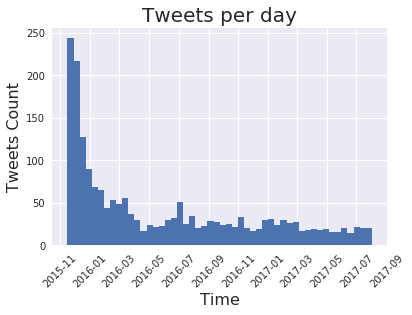

In [48]:
df_sorted = twitter_archive_master.sort_values(by="timestamp")
df_sorted = df_sorted.reset_index(drop=True)
df_sorted['ind'] = range(len(df_sorted))
df_sorted.timestamp.hist(bins=50)
plt.xlabel('Time',fontsize=16)
plt.ylabel('Tweets Count',fontsize=16)
plt.title('Tweets per day',fontsize=20)
plt.xticks(rotation=45);

**The page activity was peaking when it first started, but it has dropped significantly after a few months. It is keeping a moderate activity.**

### 2. Page Popularity

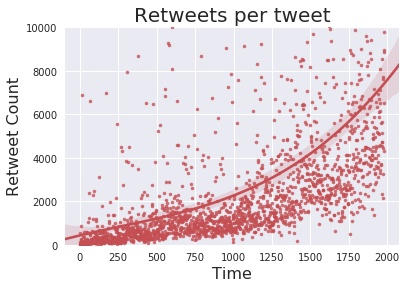

In [49]:
sns.regplot(x="ind", y="retweet_count", order = 3, data=df_sorted,marker='.',color='r');
plt.xlabel('Time',fontsize=16);
plt.ylabel('Retweet Count',fontsize=16);
plt.title('Retweets per tweet',fontsize=20);
plt.ylim((0, 10000));

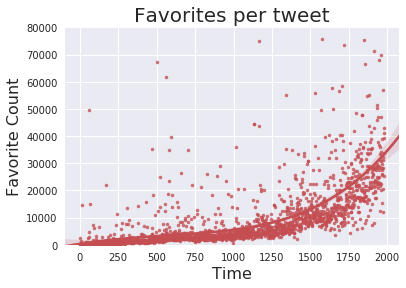

In [50]:
sns.regplot(x="ind", y="favorite_count", order = 4, data=df_sorted,marker='.',color='r');
plt.xlabel('Time',fontsize=16);
plt.ylabel('Favorite Count',fontsize=16);
plt.title('Favorites per tweet',fontsize=20);
plt.ylim((0, 80000));

**Even with few activities of the page, the popularity of the page seems to be increasing. There are also many outliers with extreme retweets and favorite counts.**

### 3. Popular dog names, breeds and stage:

In [51]:
twitter_archive_master.name.value_counts()[:15]

unknown    591
Charlie     11
Cooper      10
Oliver      10
Lucy        10
Tucker       9
Penny        9
Sadie        8
Winston      8
Daisy        7
Lola         7
Toby         7
Bo           6
Koda         6
Jax          6
Name: name, dtype: int64

In [52]:
twitter_archive_master.Pred_1st.value_counts()[:15]

golden_retriever            141
Labrador_retriever           94
Pembroke                     88
Chihuahua                    78
pug                          54
chow                         41
Samoyed                      40
Pomeranian                   38
toy_poodle                   37
malamute                     29
cocker_spaniel               27
French_bulldog               26
Chesapeake_Bay_retriever     23
miniature_pinscher           21
seat_belt                    21
Name: Pred_1st, dtype: int64

In [53]:
twitter_archive_master.stage.value_counts()

unknown    1668
pupper      209
doggo        73
puppo        23
floofer       8
Name: stage, dtype: int64

**The most popular dog name is Charlie followed by Cooper and then Oliver. [Many dog names remain unknown]**

**The most popular dog breed is golden_retriever followed by Labrador_retriever and then Pembroke.**

**The most popular dog stage is pupper followed by doggo, puppo and finally floofer. [Many dog stage remain unknown]**

### 4. Prediction mean accuracy:

In [54]:
print("Dog identification mean accuracy [Best]: ",twitter_archive_master.isdog_1st.sum()/len(twitter_archive_master))
print("Dog identification mean accuracy [Second Best]: ",twitter_archive_master.isdog_2nd.sum()/len(twitter_archive_master))
print("Dog identification mean accuracy [Third Best]: ",twitter_archive_master.isdog_3rd.sum()/len(twitter_archive_master))
print("Dog identification overall mean accuracy: ",(twitter_archive_master.isdog_1st.sum()+
                                                    twitter_archive_master.isdog_2nd.sum()+
                                                    twitter_archive_master.isdog_3rd.sum())/len(twitter_archive_master)/3)


Dog identification mean accuracy [Best]:  0.7430590610802625
Dog identification mean accuracy [Second Best]:  0.7511357900050479
Dog identification mean accuracy [Third Best]:  0.7258960121150934
Dog identification overall mean accuracy:  0.740030287733468


**The mean accuracy of identifying if an image is a dog is 74%. This is relatively low accuracy compared to the state of the art CNN classifier"**

### 5. Used Devices:

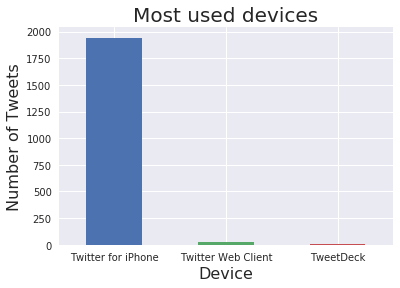

In [55]:
twitter_archive_master.device.value_counts().plot(kind='bar');
plt.xlabel('Device',fontsize=16);
plt.ylabel('Number of Tweets',fontsize=16);
plt.title('Most used devices',fontsize=20);
plt.xticks(rotation= 'horizontal');

**The page activities is mostly managed using an Iphone device. Some were carried out using "TweetDeck" or "Twitter Web Client". (have no idea what are these)**

### 6. Dog ratings:

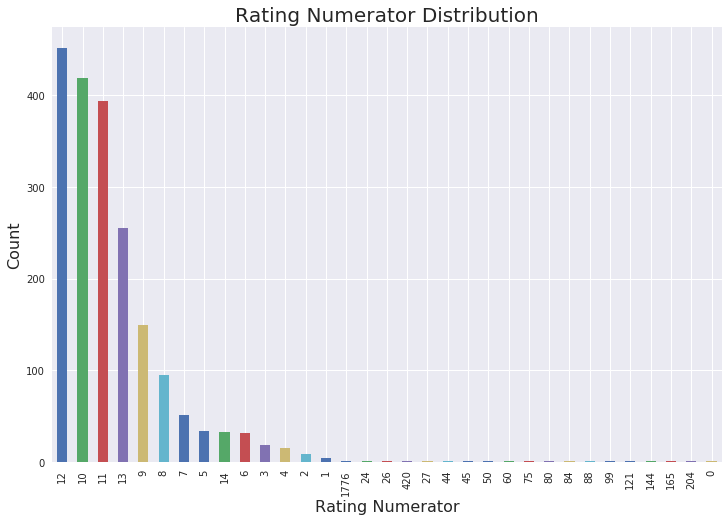

In [56]:
twitter_archive_master.rating_numerator.value_counts().plot(kind='bar',figsize=(12,8))
plt.xlabel('Rating Numerator',fontsize=16);
plt.ylabel('Count',fontsize=16);
plt.title('Rating Numerator Distribution',fontsize=20);

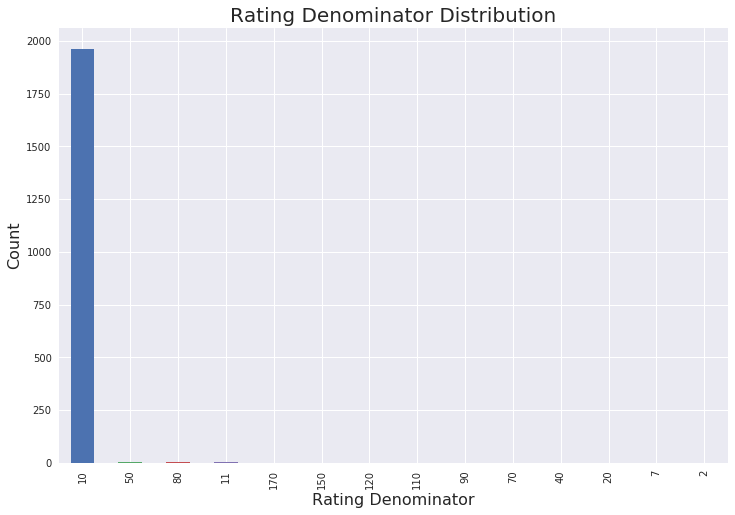

In [57]:
twitter_archive_master.rating_denominator.value_counts().plot(kind='bar',figsize=(12,8))
plt.xlabel('Rating Denominator',fontsize=16);
plt.ylabel('Count',fontsize=16);
plt.title('Rating Denominator Distribution',fontsize=20);

**The most common rating numerator is between 6 and 14 with 12 being most common. There are cases of other values like 1776 and 0.**

**The most common rating denominator is 10. There are cases of other values like 50 and 80.** 

I don't know how he decides on these ratings, but it is funny :)

### 7. Tweeting Langauge:


In [58]:
twitter_archive_master.lang.value_counts()

en    1974
nl       3
in       2
et       1
eu       1
Name: lang, dtype: int64

**English is the most used language for this page; however, there are some tweets in other languages including Dutch (nl)**


### That's it for now.
### Happy to work on this dataset :)

**P.S: I don't understand why do I get these as duplicates. [same problem if I use other columns. After inspection, it seems the "melt" method starts this problem. I hope you can help.].**

In [59]:
twitter_archive_master[twitter_archive_master.tweet_id.duplicated()]

,tweet_id,timestamp,content,retweet_count,favorite_count,name,stage,rating_numerator,rating_denominator,full_url,...,Pred_1st,Conf_1st,isdog_1st,Pred_2nd,Conf_2nd,isdog_2nd,Pred_3rd,Conf_3rd,isdog_3rd,lang
155,855851453814013952,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMa...,19196.0,47844.0,unknown,puppo,13,10,https://twitter.com/dog_rates/status/855851453...,...,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,en
163,854010172552949760,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but i...",3433.0,17169.0,unknown,floofer,11,10,https://twitter.com/dog_rates/status/854010172...,...,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,en
361,817777686764523521,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""...",3084.0,11901.0,Dido,pupper,13,10,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,en
420,808106460588765185,2016-12-12 00:29:28,Here we have Burke (pupper) and Dexter (doggo)...,2525.0,9701.0,unknown,pupper,12,10,https://twitter.com/dog_rates/status/808106460...,...,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,en
451,801115127852503040,2016-11-22 17:28:25,This is Bones. He's being haunted by another d...,2429.0,8992.0,Bones,pupper,12,10,https://twitter.com/dog_rates/status/801115127...,...,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True,en
542,785639753186217984,2016-10-11 00:34:48,This is Pinot. He's a sophisticated doggo. You...,2561.0,8735.0,Pinot,pupper,10,10,https://twitter.com/dog_rates/status/785639753...,...,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False,en
697,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",2173.0,6620.0,Maggie,pupper,12,10,https://twitter.com/dog_rates/status/759793422...,...,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,en
757,751583847268179968,2016-07-09 01:08:47,Please stop sending it pictures that don't eve...,1265.0,4849.0,unknown,pupper,5,10,https://twitter.com/dog_rates/status/751583847...,...,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,en
858,741067306818797568,2016-06-10 00:39:48,This is just downright precious af. 12/10 for ...,3520.0,10342.0,just,pupper,12,10,https://twitter.com/dog_rates/status/741067306...,...,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True,en
908,733109485275860992,2016-05-19 01:38:16,"Like father (doggo), like son (pupper). Both 1...",17621.0,44619.0,unknown,pupper,12,10,https://twitter.com/dog_rates/status/733109485...,...,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False,en
